In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"

In [ ]:
data_path = '/content/Amazon Sales data.csv'
df = pd.read_csv(data_path)
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
# Bar plot for Region vs Total Profit
total_profit_by_region = df.groupby('Region')['Total Profit'].sum().reset_index()

fig = px.bar(df, x='Region', y='Total Profit', color='Region', title='Total Profit by Region',
             labels={'Total Profit': 'Total Profit ($)'})
for region, total_profit in zip(total_profit_by_region['Region'], total_profit_by_region['Total Profit']):
    fig.add_annotation(x=region,y=total_profit,text=f'${total_profit:,.2f}',
        arrowhead=5, ax=0,ay=-30)
fig.show()

In [ ]:
fig_sunburst = px.sunburst(df, path=['Region', 'Sales Channel'], values='Total Profit',
                            title='Profit based on Sales Channel and Region',
                            labels={'Total Profit': 'Total Profit ($)'},
                            color='Total Profit')
fig_sunburst.show()

In [ ]:
fig_sunburst = px.sunburst(df, path=['Region', 'Country'], values='Units Sold',
                            title='Profit by Country and Region',
                            labels={'Total Profit': 'Total Profit ($)'},
                            color='Total Profit',color_continuous_scale='Viridis')
fig_sunburst.show()

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract Year, Month, and Year-Month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Year_Month'] = df['Order Date'].dt.to_period('M')
df['Year_Month'] = df['Order Date'].astype(str)

# Group by Year, Month, and Year-Month and calculate sum for each metric
monthly_trends = df.groupby(['Year', 'Month', 'Year_Month']).agg({'Total Revenue': 'sum','Total Cost': 'sum',
    'Total Profit': 'sum'}).reset_index()

# Monthly Trends Line Chart
fig_monthly = px.line(monthly_trends, x='Year_Month', y=['Total Revenue', 'Total Cost', 'Total Profit'],
                      title='Monthly Trends for Revenue, Cost, and Profit',
                      labels={'value': 'Amount ($)'},
                      line_shape='linear', render_mode='svg')

# Yearly Trends Line Chart
fig_yearly = px.line(monthly_trends.groupby('Year').sum().reset_index(),
                     x='Year', y=['Total Revenue', 'Total Cost', 'Total Profit'],
                     title='Yearly Trends for Revenue, Cost, and Profit',
                     labels={'value': 'Amount ($)'},
                     line_shape='linear', render_mode='svg')


# Show the plots
fig_monthly.show()
fig_yearly.show()

<ipython-input-17-1c23b712b42d>:20: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
# Yearly-Month-wise Trends Line Chart
fig_yearly_monthly = px.line(monthly_trends, x='Year_Month', y=['Total Revenue', 'Total Cost', 'Total Profit'],
                             facet_col='Year', facet_col_wrap=3,
                             title='Yearly-Month-wise Trends for Revenue, Cost, and Profit',
                             labels={'value': 'Amount ($)'},
                             line_shape='linear', render_mode='svg')
fig_yearly_monthly.show()

In [ ]:
# Different item types in terms of revenue, cost, and profit
fig = px.bar(df, x='Item Type', y=['Total Revenue', 'Total Cost', 'Total Profit'],
             title='Item Type vs. Total Revenue, Total Cost, Total Profit',
             labels={'value': 'Amount ($)'},
             color_discrete_map={'Total Revenue': 'Orange', 'Total Cost': 'red', 'Total Profit': 'Green'})

fig.update_layout(barmode='group')
fig.show()

In [ ]:
# Key Metrics

fig1 = px.bar(df, x='Country', y=['Total Revenue', 'Total Cost', 'Total Profit'],
              title='Total Revenue, Total Cost, and Total Profit by Country',labels={'value': 'Amount ($)'},
              color_discrete_map={'Total Revenue': 'blue', 'Total Cost': 'red', 'Total Profit': 'green'})
fig1.show()

In [ ]:
# Units Sold in Country and Region
fig_units_sold = px.bar(df, x='Country', y='Units Sold', color='Region',
title='Units Sold in Country and Region',
                        labels={'Units Sold': 'Number of Units'})
fig_units_sold.show()

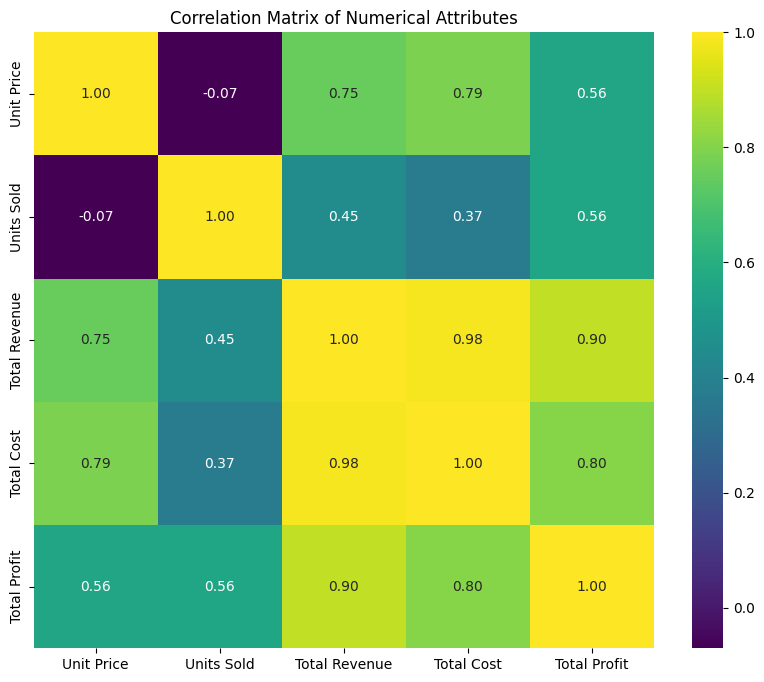

In [ ]:
# Correlation between numerical attributes
numerical_attributes = ['Unit Price', 'Units Sold', 'Total Revenue', 'Total Cost', 'Total Profit']
correlation_matrix = df[numerical_attributes].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()